# Exemplo de Análise de Dados

## Introdução

In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20
pd.options.display.float_format = '${:,.2f}'.format

## Banco de Dados da Comissão Eleitoral Federal dos EUA em 2012

In [2]:
low_memory=False
fec = pd.read_csv('P00000001-ALL.csv')
fec.info()

/tmp/ipykernel_3132/2358278720.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('P00000001-ALL.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [3]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                      $50.00
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [3]:
unique_cands = fec.cand_nm.unique()
print(unique_cands)
unique_cands[0]

['Bachmann, Michelle' 'Romney, Mitt' 'Obama, Barack'
 "Roemer, Charles E. 'Buddy' III" 'Pawlenty, Timothy' 'Johnson, Gary Earl'
 'Paul, Ron' 'Santorum, Rick' 'Cain, Herman' 'Gingrich, Newt'
 'McCotter, Thaddeus G' 'Huntsman, Jon' 'Perry, Rick']


'Bachmann, Michelle'

In [4]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [5]:
#fec.cand_nm[123456:123461]
#fec.cand_nm[123456:123461].map(parties)
# Adiciona o partido como uma nova coluna
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [6]:
(fec.contb_receipt_amt > 0).value_counts()

contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

In [7]:
fec = fec[fec.contb_receipt_amt > 0]

In [11]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo['cand_nm'].value_counts()
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,"$340,230,183.00",US GOVERNMENT,FOREIGN SERVICE OFFICER,$25.00,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,"$340,230,183.00",US GOVERNMENT,FOREIGN SERVICE OFFICER,$110.00,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,"$91,280,020.00",DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,$250.00,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,"$91,280,005.00",CISCO,ENGINEER,$30.00,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,"$90,120,092.00",RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,$100.00,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


### Estatísticas de Doação por Ocupação e Empregador

In [9]:
fec.contbr_occupation.value_counts()[:10]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

In [10]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,"$11,141,982.97","$7,477,194.43"
C.E.O.,"$1,690.00","$2,592,983.11"
CEO,"$2,073,284.79","$1,618,057.41"
CONSULTANT,"$2,459,912.71","$2,544,725.45"
ENGINEER,"$951,525.55","$1,818,373.70"
EXECUTIVE,"$1,355,161.05","$4,138,850.09"
HOMEMAKER,"$4,248,875.80","$13,634,275.78"
INFORMATION REQUESTED,"$4,866,973.96","$3,896,615.74"
INFORMATION REQUESTED PER BEST EFFORTS,NaN,"$16,340,533.64"


In [12]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='contbr_occupation'>

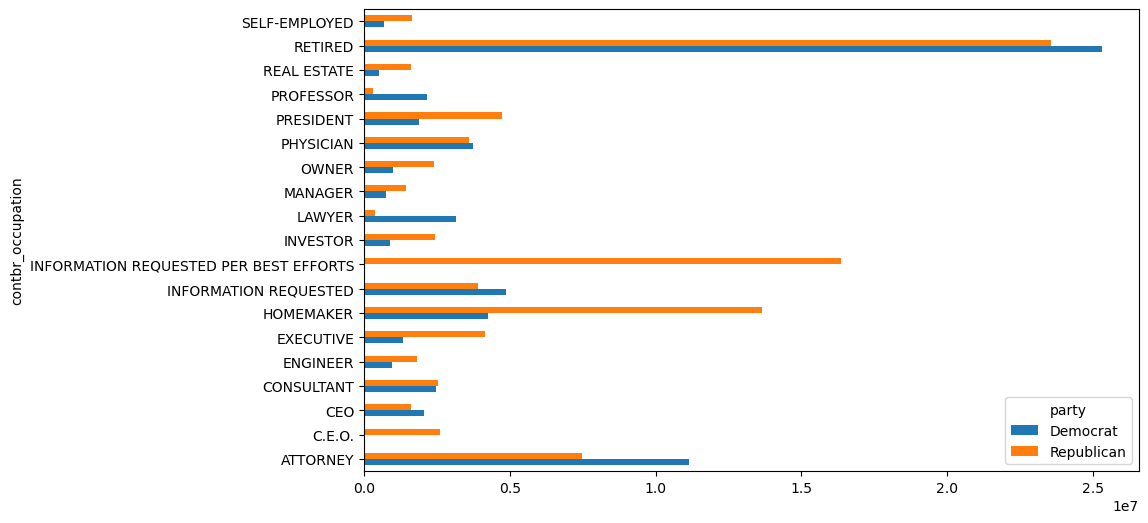

In [13]:
over_2mm.plot(kind='barh')

### Separando os Valores das Doações em Buckets

In [14]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [15]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
pd.options.display.float_format = '{:,.2f}'.format
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [16]:
plt.figure()
pd.options.display.float_format = '${:,.2f}'.format

<Figure size 1000x600 with 0 Axes>

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA             56,405.00        135.00
AB              2,048.00           NaN
AE             42,973.75      5,680.00
AK            281,840.15     86,204.24
AL            543,123.48    527,303.51
...                  ...           ...
WI          1,130,155.46    270,316.32
WV            169,154.47    126,725.12
WY            194,046.74    252,595.84
XX                   NaN    400,250.00
ZZ              5,963.00           NaN

[67 rows x 2 columns]
cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA                  1.00          0.00
AB                  1.00           NaN
AE                  0.88          0.12
AK                  0.77          0.23
AL                  0.51          0.49
...                  ...           ...
WI                  0.81          0.19
WV                  0.57          0.43
WY                  0.43          0.57
XX                   NaN          1.00
ZZ

<Axes: ylabel='contbr_st'>

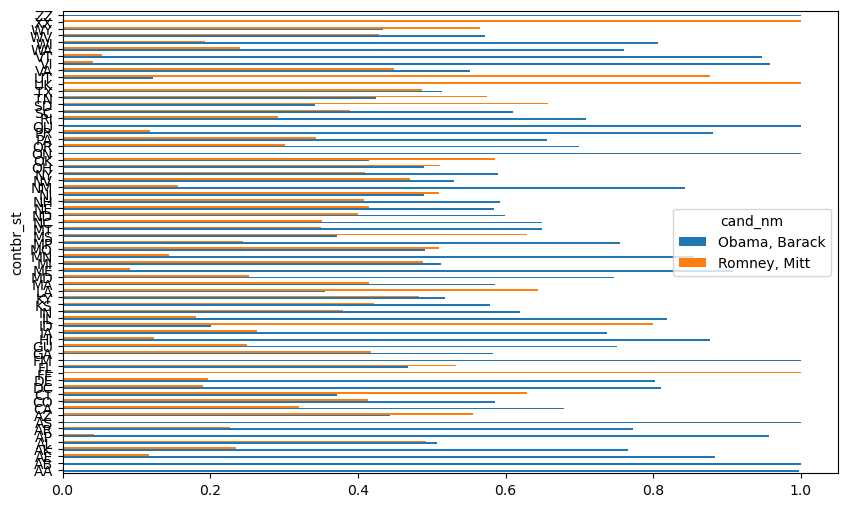

In [23]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
print(bucket_sums)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
print(normed_sums)
normed_sums.plot(kind='barh')

### Estatísticas de Doação por Estado

In [19]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,"$281,840.15","$86,204.24"
AL,"$543,123.48","$527,303.51"
AR,"$359,247.28","$105,556.00"
AZ,"$1,506,476.98","$1,888,436.23"
CA,"$23,824,984.24","$11,237,636.60"
...,...,...
WA,"$4,250,933.16","$1,341,521.56"
WI,"$1,130,155.46","$270,316.32"
WV,"$169,154.47","$126,725.12"


cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK                 $0.77         $0.23
AL                 $0.51         $0.49
AR                 $0.77         $0.23
AZ                 $0.44         $0.56
CA                 $0.68         $0.32
CO                 $0.59         $0.41
CT                 $0.37         $0.63
DC                 $0.81         $0.19
DE                 $0.80         $0.20
FL                 $0.47         $0.53


<Axes: ylabel='contbr_st'>

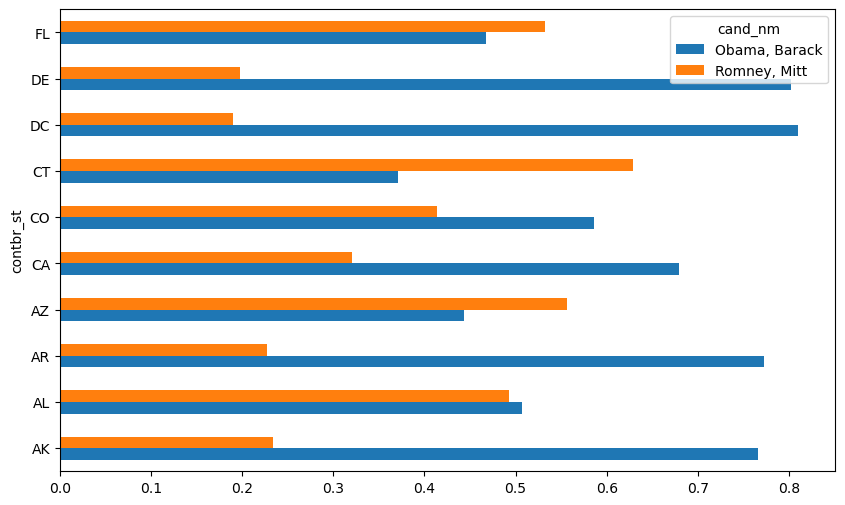

In [21]:
percent = totals.div(totals.sum(1), axis=0)
print(percent[:10])
percent[:10].plot(kind='barh')